## import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## set path

In [4]:
datadir = '/Users/alexbarnett/Documents/Community_detection/shopcon/'

## load data

In [5]:
RDM_sim_data = pd.read_excel(datadir+'within_between_RDM_sim_358.xlsx')
net2net_sim_data = pd.read_excel(datadir+'net2net_similarity_358.xlsx')

net2net_sim_data_new = pd.read_excel(datadir+'net2net_similarity_358_all_Nov2020_lang_vis_sm.xlsx')
net2net_sim_data_cortex = pd.read_excel(datadir+'net2net_similarity_358_all_March2021_wholecortex.xlsx')
RDM_sim_data_all = pd.read_excel(datadir+'within_between_RDM_sim_358_all_zero_diag.xlsx')
net2net_sim_data_all = pd.read_excel(datadir+'net2net_similarity_358_all_May2020.xlsx')

participation_net_sim = pd.read_excel(datadir+'participation_net_similarity.xlsx')


scene_food_PS_roi1 = pd.read_excel(datadir+'roi_1_scene_food_vis_PS.xlsx')

SR_FR_CR_rep = pd.read_csv('/Users/alexbarnett/Desktop/RSA_base_glasser/SR_FR_CR_representation.txt',
                           header=None, names = ['subjid','PS','SR','FR','CR','ROI'],index_col=False)

SR_FR_CR_network_rep = pd.read_csv(datadir+'SR_FR_CR_network_representation.txt',
                           header=None, names = ['subjid','PS','SR','FR','CR','Network'],index_col=False)



## first DMN only

Here I plot the within to between network RDM similarity and calculate the statistical difference using a linear mixed model. I then plot the RDM similarity values for each "seed" network to every other "target" network (essentially a summary of the similarity matrix).

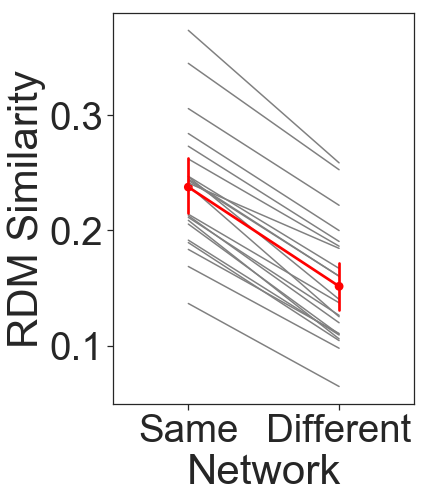

In [6]:
plt.figure(figsize=(7, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")

tick_labels = ["Same", "Different"]

plot_one = sns.lineplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data, color="grey", estimator = None, units = "subjid", sort = False)
sns.pointplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data, color = "red")

#plot_two = sns.lineplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data, color="grey", estimator = None, units = "subjid", sort = False)
#sns.violinplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data)
plot_one.set(xlabel="Network")
plot_one.set_xticklabels(tick_labels)


fig = plot_one.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"within_between.png",dpi=300)

In [36]:
RDM_sim_data_model = RDM_sim_data
RDM_sim_data_model['pairing'] = RDM_sim_data_model['Network Pairing']
RDM_sim_data_model['sim'] = RDM_sim_data_model['RDM Similarity']

md = smf.mixedlm("sim~pairing",RDM_sim_data_model, groups=RDM_sim_data_model["subjid"])
mdf=md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   sim    
No. Observations:   44        Method:               REML   
No. Groups:         22        Scale:                0.0001 
Min. group size:    2         Likelihood:           88.3500
Max. group size:    2         Converged:            Yes    
Mean group size:    2.0                                    
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.152    0.011 13.263 0.000  0.129  0.174
pairing[T.Within] 0.086    0.003 28.510 0.000  0.080  0.092
Group Var         0.003    0.123                           



/Users/alexbarnett/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


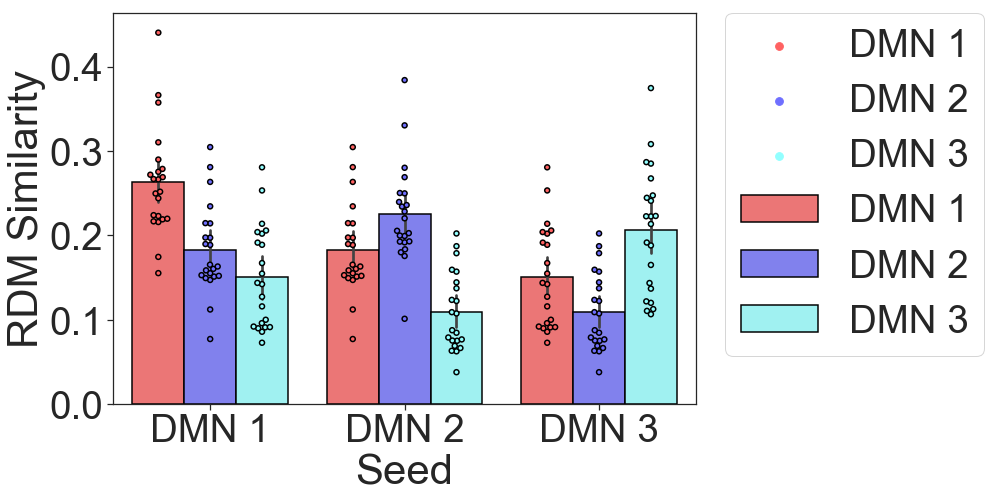

In [50]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")

# Create an array with the colors you want to use
colors = ["#FF6262", "#6F6FFF","#92FFFF"]
#colors = ["#CC0000", "#0066CC","#00CCCC"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plot_two = sns.barplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data,edgecolor = "black", linewidth = 1.5)
sns.swarmplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data, dodge = True, edgecolor = "black", linewidth = 1.5)


plot_two.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plot_two.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"net2net_sim.png",dpi=300)

## Now repeat, but with context network in

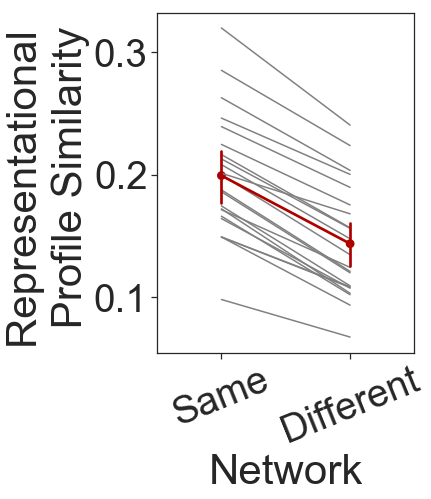

In [6]:
plt.figure(figsize=(7, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")


tick_labels = ["Same", "Different"]

plot_one = sns.lineplot(x = "Network_Pairing", y = "RDM_Similarity", data=RDM_sim_data_all, color="grey", estimator = None, units = "subjid", sort = False)
sns.pointplot(x = "Network_Pairing", y = "RDM_Similarity", data=RDM_sim_data_all, color = "#AF0000")

#plot_two = sns.lineplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data, color="grey", estimator = None, units = "subjid", sort = False)
#sns.violinplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data)
plot_one.set(ylabel = 'Representational \n Profile Similarity')

plot_one.set(xlabel="Network")
plot_one.set_xticklabels(tick_labels,rotation = 22)

fig = plot_one.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"within_between_all.pdf",dpi=300)

[Text(0,0,'Same'), Text(0,0,'Different')]

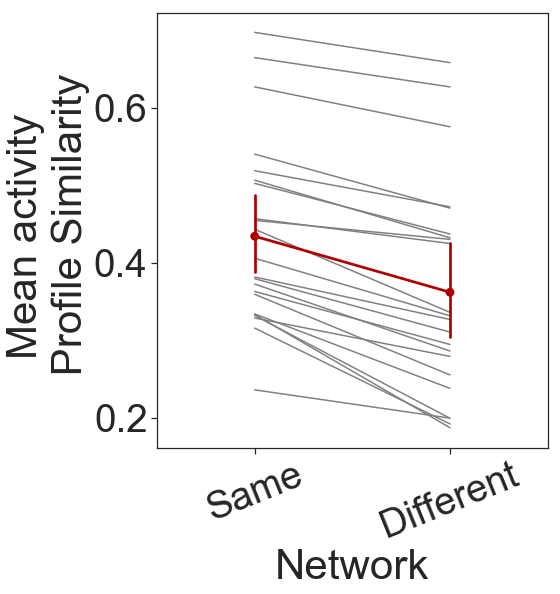

In [38]:
plt.figure(figsize=(7, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")


tick_labels = ["Same", "Different"]

plot_one = sns.lineplot(x = "Network_Pairing", y = "mean_BOLD_sim", data=RDM_sim_data_all, color="grey", estimator = None, units = "subjid", sort = False)
sns.pointplot(x = "Network_Pairing", y = "mean_BOLD_sim", data=RDM_sim_data_all, color = "#AF0000")

#plot_two = sns.lineplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data, color="grey", estimator = None, units = "subjid", sort = False)
#sns.violinplot(x = "Network Pairing", y = "RDM Similarity", data=RDM_sim_data)
plot_one.set(ylabel = 'Mean activity \n Profile Similarity')

plot_one.set(xlabel="Network")
plot_one.set_xticklabels(tick_labels,rotation = 22)


<Figure size 504x576 with 0 Axes>

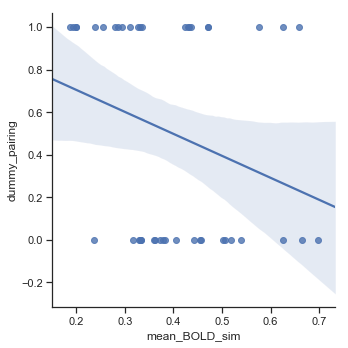

In [50]:
plt.figure(figsize=(7, 8))
sns.set(font_scale=1)
sns.set_style("ticks")

sns.lmplot(y ='dummy_pairing', x = 'mean_BOLD_sim', data =  RDM_sim_data_all)

In [47]:
RDM_sim_data_model_all = RDM_sim_data_all
RDM_sim_data_model_all['pairing'] = RDM_sim_data_model_all['Network_Pairing']
RDM_sim_data_model_all['sim'] = RDM_sim_data_model_all['RDM_Similarity']

md = smf.mixedlm("dummy_pairing~sim*mean_BOLD_sim",RDM_sim_data_model_all, groups=RDM_sim_data_model_all["subjid"])
mdf=md.fit()
print(mdf.summary())
mdf.pvalues


             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  dummy_pairing
No. Observations:   44       Method:              REML         
No. Groups:         22       Scale:               0.0251       
Min. group size:    2        Likelihood:          -17.7506     
Max. group size:    2        Converged:           Yes          
Mean group size:    2.0                                        
---------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept           3.595    0.390  9.221 0.000   2.831   4.359
sim               -22.085    3.439 -6.421 0.000 -28.825 -15.344
mean_BOLD_sim       0.061    1.194  0.051 0.959  -2.280   2.402
sim:mean_BOLD_sim   9.102    5.461  1.667 0.096  -1.602  19.806
Group Var           0.550    1.779                             



Intercept            2.937149e-20
sim                  1.352101e-10
mean_BOLD_sim        9.589954e-01
sim:mean_BOLD_sim    9.557185e-02
Group Var            5.134400e-02
dtype: float64

In [52]:
md = smf.mixedlm("dummy_pairing~sim",RDM_sim_data_model_all, groups=RDM_sim_data_model_all["subjid"])
mdf=md.fit()
print(mdf.summary())
mdf.pvalues

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: dummy_pairing
No. Observations: 44      Method:             REML         
No. Groups:       22      Scale:              0.1946       
Min. group size:  2       Likelihood:         -26.1013     
Max. group size:  2       Converged:          Yes          
Mean group size:  2.0                                      
------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept    1.294     0.091   14.245  0.000   1.116   1.472
sim         -4.627     0.360  -12.834  0.000  -5.333  -3.920
Group Var    0.000                                          



/Users/alexbarnett/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/alexbarnett/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/alexbarnett/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid val

Intercept    4.810834e-46
sim          1.050877e-37
Group Var             NaN
dtype: float64

In [32]:
net2net_sim_data_all.head(1)

,subjid,Seed,Target,RDM Similarity
0,1,MTN,MTN,0.188352


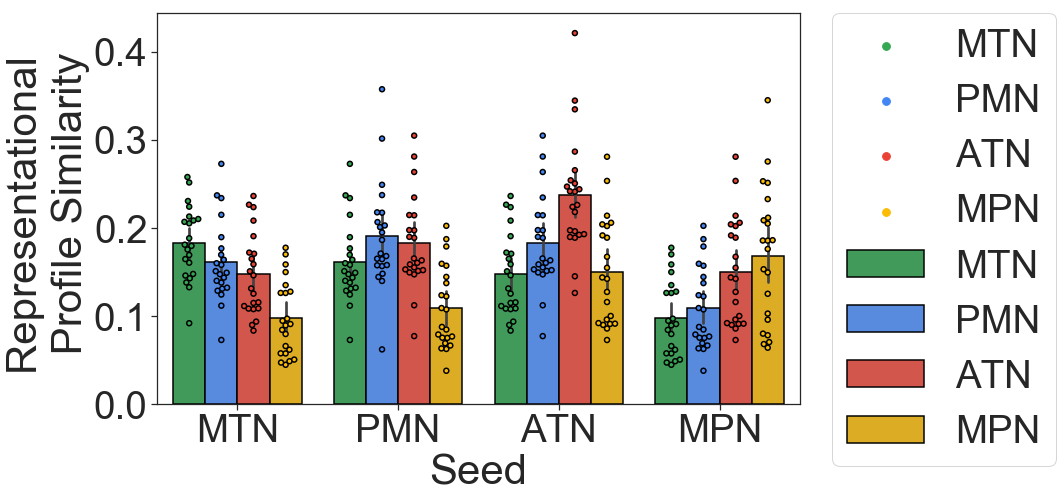

In [17]:
plt.figure(figsize=(16, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")

# Create an array with the colors you want to use
colors = ['#34A853','#4285F4','#EA4335','#FBBC05']
labels = ["MTN","PM","AT","MP"]
#colors = ["#CC0000", "#0066CC","#00CCCC"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plot_two = sns.barplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_all,
                       edgecolor = "black", linewidth = 1.5, order = labels,
                      hue_order = labels)
sns.swarmplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_all, 
              dodge = True, edgecolor = "black", linewidth = 1.5,
             order = labels, hue_order = labels)


plot_two.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot_two.set(ylabel = 'Representational \n Profile Similarity')
fig = plot_two.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"net2net_sim_all.pdf",dpi=300)

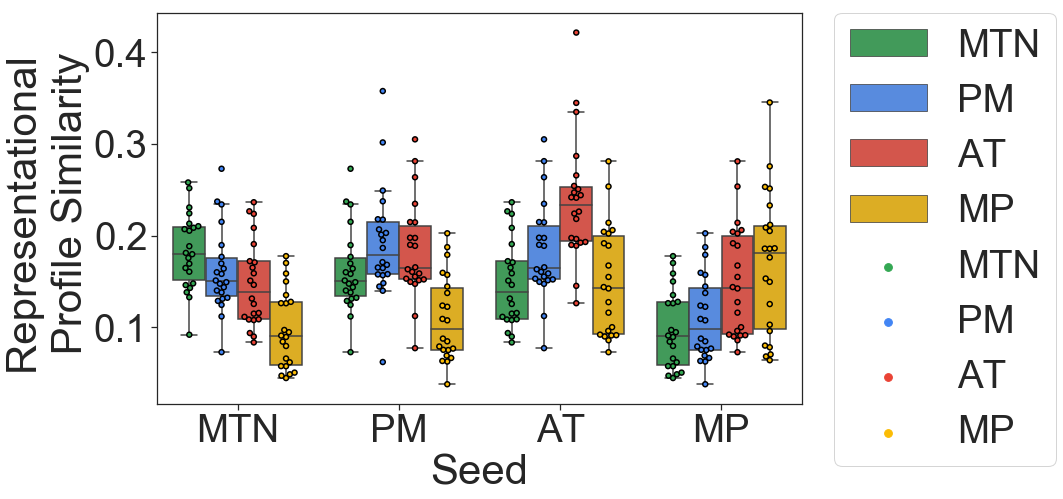

In [9]:
plt.figure(figsize=(16, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")

# Create an array with the colors you want to use
colors = ['#34A853','#4285F4','#EA4335','#FBBC05']
labels = ["MTN","PM","AT","MP"]
#colors = ["#CC0000", "#0066CC","#00CCCC"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plot_two = sns.boxplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_all,
                        linewidth = 1.5, order = labels,fliersize=0,
                      hue_order = labels)
sns.swarmplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_all, 
              dodge = True, edgecolor = "black", linewidth = 1.5,
             order = labels, hue_order = labels)


plot_two.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot_two.set(ylabel = 'Representational \n Profile Similarity')
fig = plot_two.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"net2net_sim_all_boxplot.pdf",dpi=300)

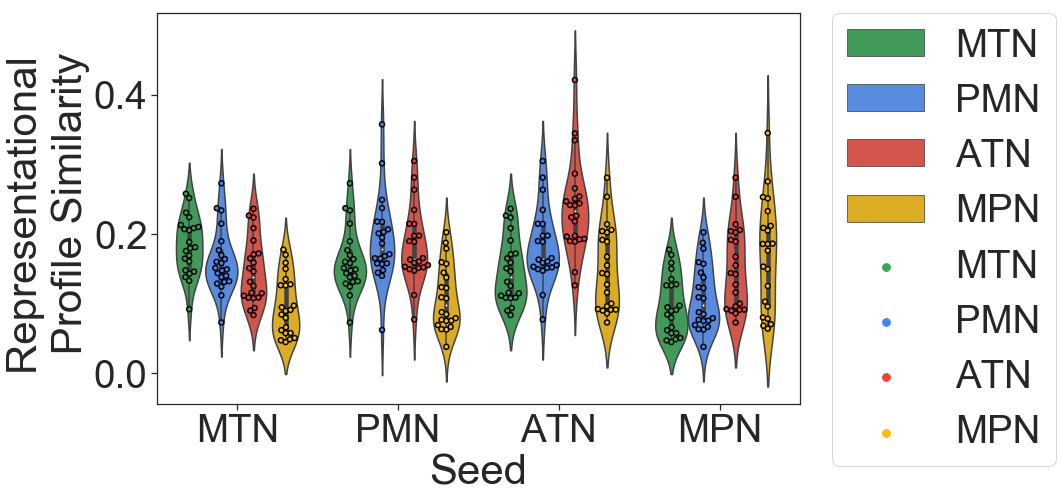

In [40]:
plt.figure(figsize=(16, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")

# Create an array with the colors you want to use
colors = ['#34A853','#4285F4','#EA4335','#FBBC05']
labels = ["MTN","PMN","ATN","MPN"]
#colors = ["#CC0000", "#0066CC","#00CCCC"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plot_two = sns.violinplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_all,
                        linewidth = 1.5, order = labels,
                      hue_order = labels)
sns.swarmplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_all, 
              dodge = True, edgecolor = "black", linewidth = 1.5,
             order = labels, hue_order = labels)


plot_two.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot_two.set(ylabel = 'Representational \n Profile Similarity')
fig = plot_two.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"net2net_sim_all_violinplot.pdf",dpi=300)

In [35]:
participation_net_sim.head(10)

,Participation,Second Order Similarity,Within Network Second Order,Between Network Second Order,Participation Rank,Second Order Similarity Rank
0,0.585045,0.2166,0.2724,0.1953,26.0,104.0
1,0.575528,0.1750,0.2042,0.1638,24.0,65.0
2,0.522776,0.1799,0.2278,0.1616,14.0,71.0
3,0.174666,0.1761,0.2239,0.1579,5.0,67.0
4,0.096270,0.1853,0.2356,0.1660,3.0,78.0
5,0.742774,0.1151,0.1396,0.1058,102.0,13.0
6,0.506856,0.1248,0.1743,0.1060,13.0,19.0
7,0.729062,0.1547,0.1482,0.1572,95.0,49.0
8,0.707146,0.1331,0.1618,0.1221,81.0,27.0
9,0.529745,0.1317,0.1767,0.1145,15.0,25.0


In [34]:
participation_net_sim["Participation Rank"] = participation_net_sim["Participation"].rank()
participation_net_sim["Second Order Similarity Rank"] = participation_net_sim["Second Order Similarity"].rank()


## look at visual network, language network and somatomotor network

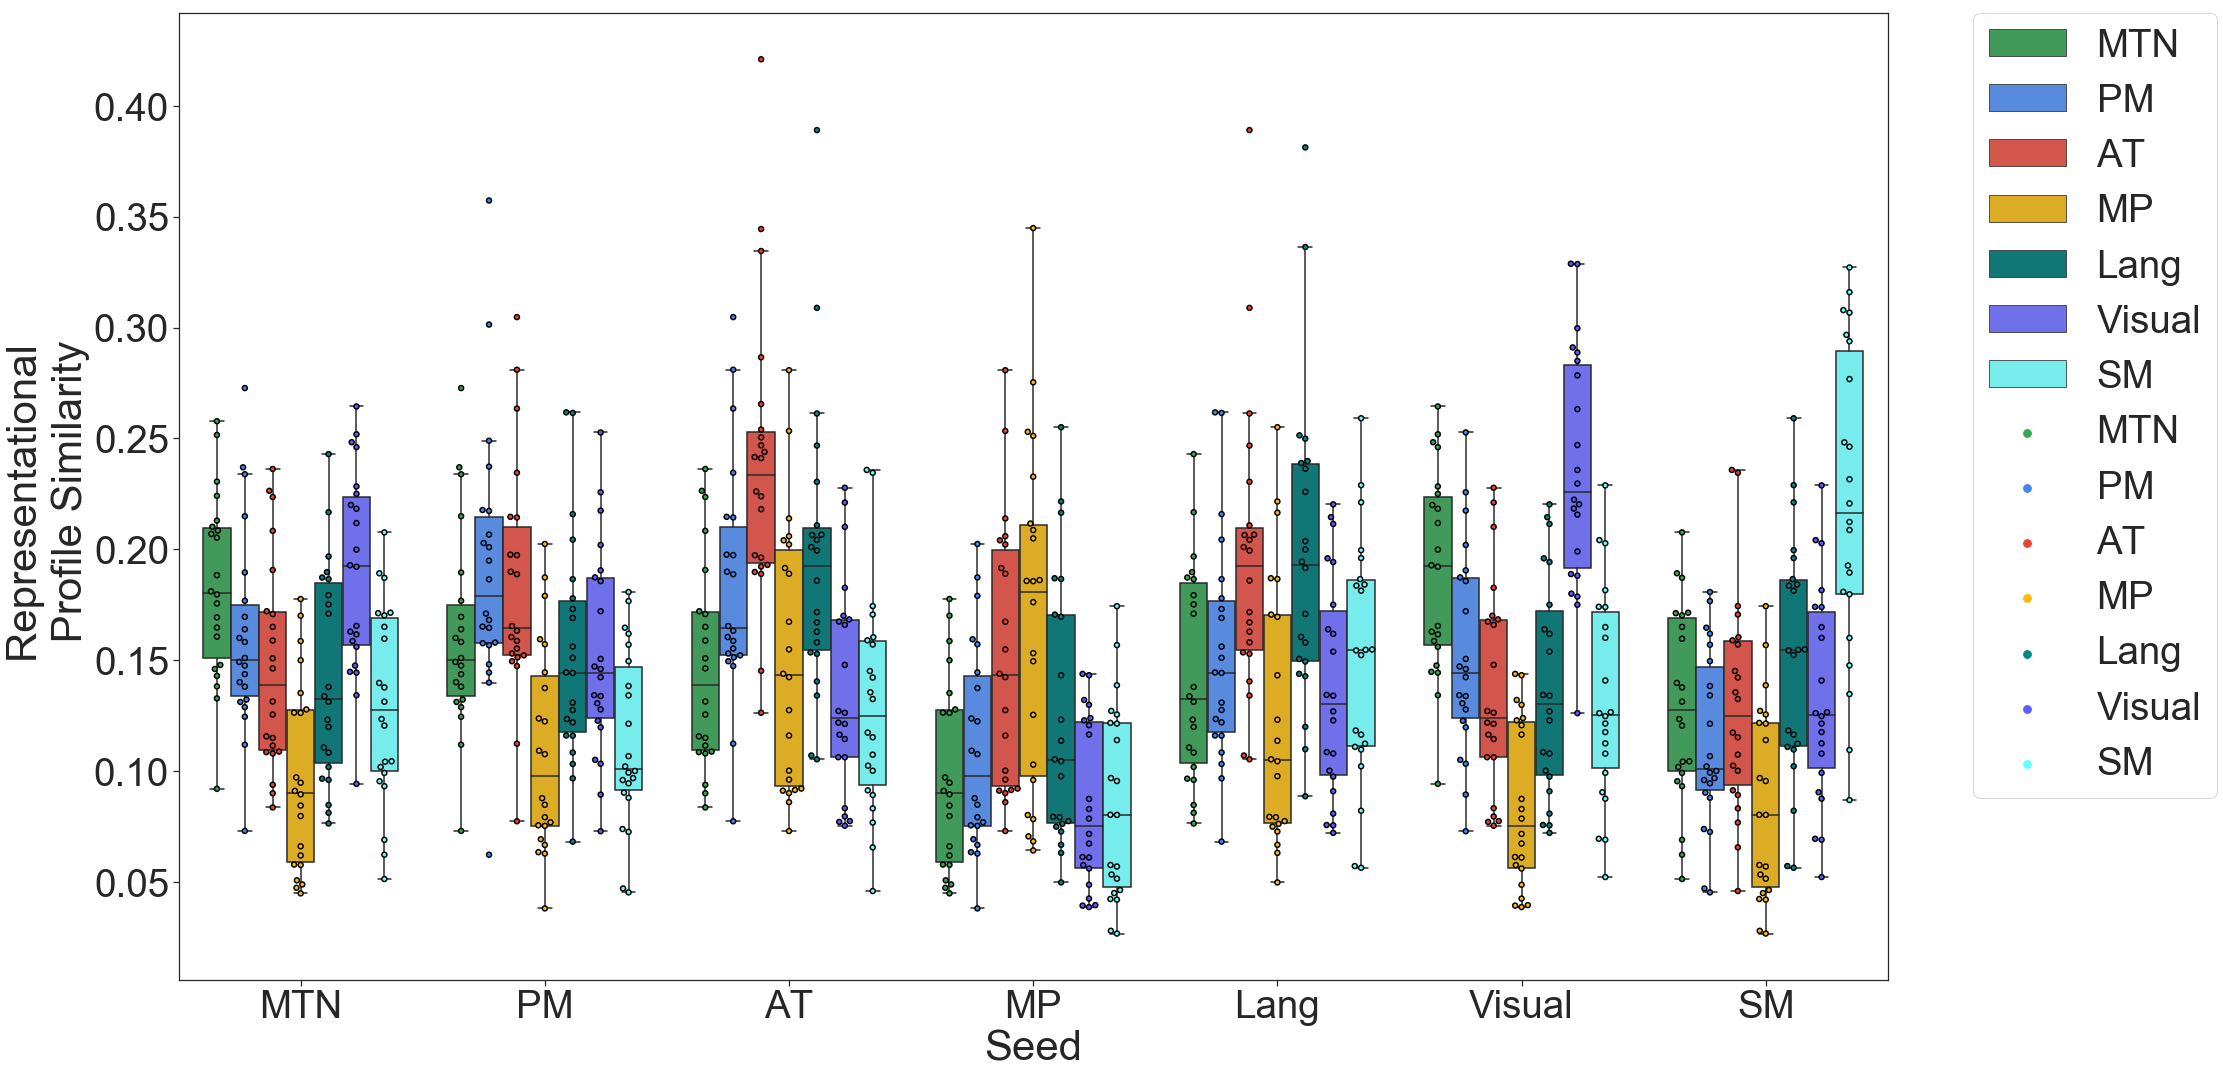

In [6]:
plt.figure(figsize=(32, 16))
sns.set(font_scale=3.5)
sns.set_style("ticks")

# Create an array with the colors you want to use
colors = ['#34A853','#4285F4','#EA4335','#FBBC05','#008787','#5c5cff','#64ffff']
labels = ["MTN","PM","AT","MP","Lang","Visual","SM"]
#colors = ["#CC0000", "#0066CC","#00CCCC"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plot_two = sns.boxplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_new,                        linewidth = 1.5, order = labels,fliersize=0,
                      hue_order = labels)
sns.swarmplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_new, 
              dodge = True, edgecolor = "black", linewidth = 1.5,
             order = labels, hue_order = labels)


plot_two.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot_two.set(ylabel = 'Representational \n Profile Similarity')
fig = plot_two.get_figure()
fig.tight_layout(h_pad = 0)
#fig.savefig(datadir+"net2net_sim_all_boxplot_lang_vis_sm.pdf",dpi=300)

In [15]:
net2net_sim_data_cortex[net2net_sim_data_cortex['Target']==1]

,subjid,Seed,Target,RDM Similarity
0,101,1,1,0.220307
13,101,2,1,0.099185
26,101,3,1,0.106026
39,101,4,1,0.182920
52,101,5,1,0.056850
...,...,...,...,...
3653,133,9,1,0.057462
3666,133,10,1,0.083233
3679,133,11,1,0.161640
3692,133,12,1,0.147141


In [16]:
datadir

'/Users/alexbarnett/Documents/Community_detection/shopcon/'

<Figure size 1152x1152 with 0 Axes>

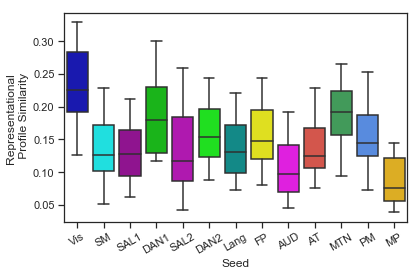

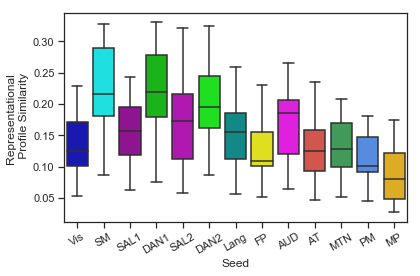

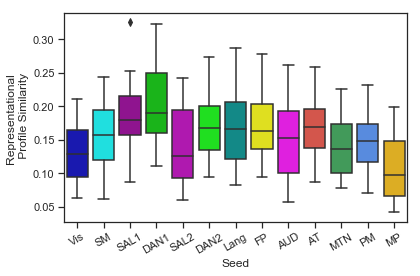

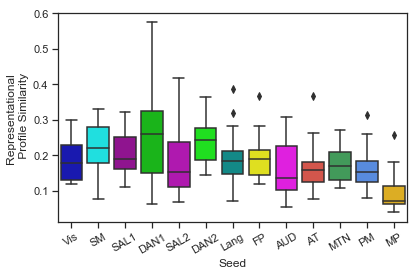

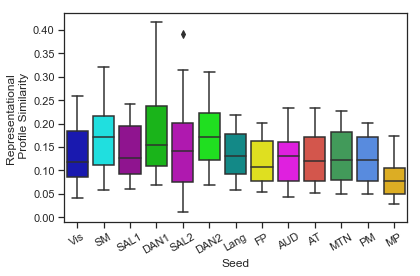

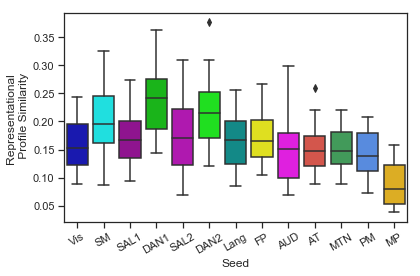

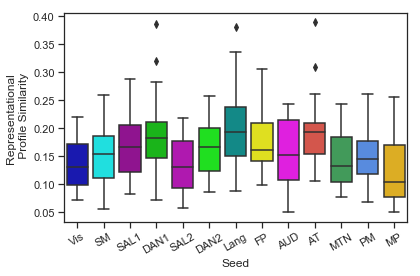

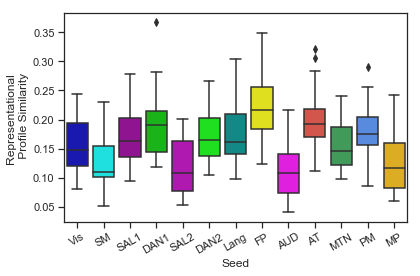

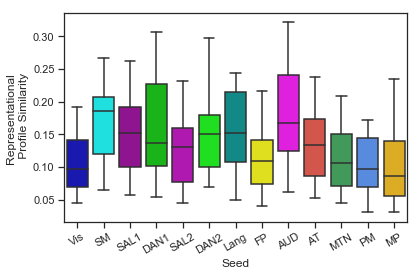

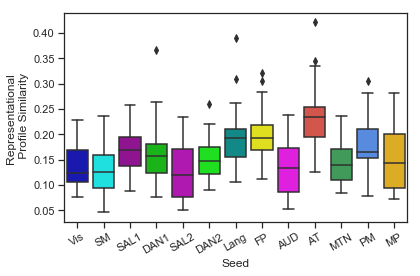

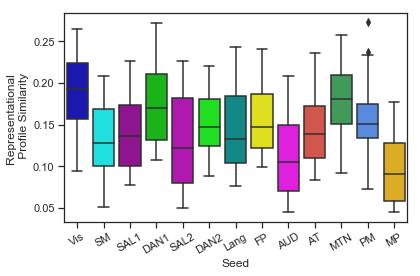

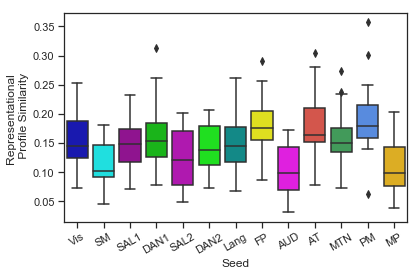

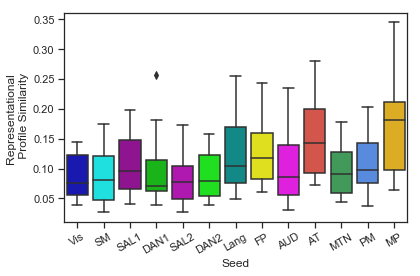

In [31]:
plt.figure(figsize=(16, 16))
sns.set(font_scale=1)
sns.set_style("ticks")

# Create an array with the colors you want to use
#colors = ['#34A853','#4285F4','#EA4335','#FBBC05','#008787','#5c5cff','#64ffff']
labels = ['Vis','SM','SAL1','DAN1','SAL2','DAN2','Lang','FP','AUD','AT','MTN','PM','MP']
colors = ["#0000C8", "#00FFFF","#A300A3","#00CE00","#C800C8","#00FF00","#009C9A","#FFFF00","#FF00FF","#EA4335","#34A853","#4285F4","#FBBC05"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
for target in range(13):
    plt.figure()
    plot_two = sns.boxplot(x = "Seed", y = "RDM Similarity", data = net2net_sim_data_cortex[net2net_sim_data_cortex['Target']==target+1], palette = colors)
    #sns.swarmplot(x = "Seed", y = "RDM Similarity", hue = "Target", data = net2net_sim_data_cortex, 
    #              dodge = True, edgecolor = "black", linewidth = 1.5)


    #plot_two.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plot_two.set(ylabel = 'Representational \n Profile Similarity')
    plot_two.set_xticklabels(labels,rotation=30)
    fig = plot_two.get_figure()
    fig.tight_layout(h_pad = 0)
    fig.savefig(datadir+'net2net_sim_all_boxplot_target' + str(target+1) + '.pdf',dpi=300)

<Figure size 720x720 with 0 Axes>

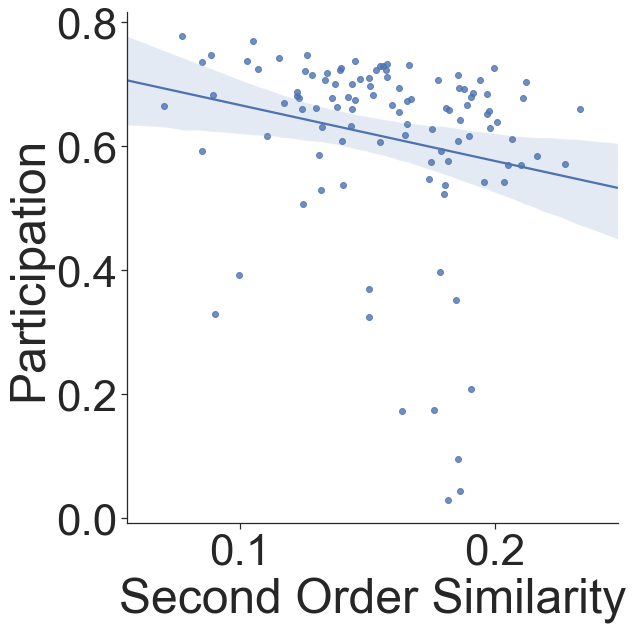

In [40]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=4)
sns.set_style("ticks")

sns.lmplot(x = "Second Order Similarity",y = "Participation", data = participation_net_sim, height = 10, aspect = 1)

<Figure size 720x720 with 0 Axes>

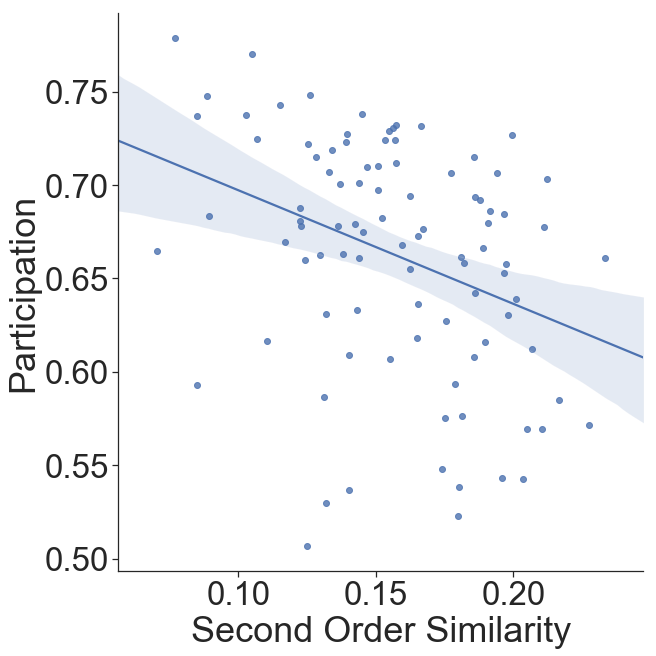

In [28]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=3)
sns.set_style("ticks")

sns.lmplot(x = "Second Order Similarity",y = "Participation", data = participation_net_sim[participation_net_sim['Participation']>0.5], height = 10, aspect = 1)

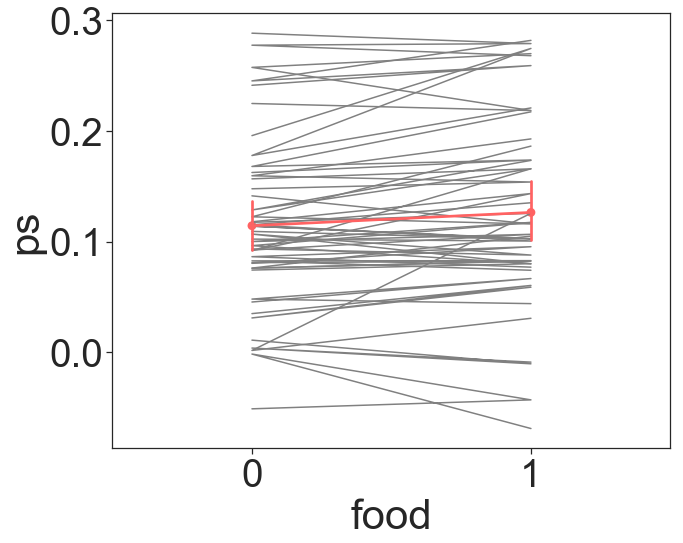

In [79]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")

# Create an array with the colors you want to use
colors = ["#FF6262", "#6F6FFF","#92FFFF"]
#colors = ["#CC0000", "#0066CC","#00CCCC"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plot_three = sns.lineplot(x = "food", y = "ps", data = scene_food_PS_roi1, color="grey", estimator = None, units = "subjid", sort = False)
sns.pointplot(x = "food", y = "ps",  data = scene_food_PS_roi1, )


#plot_three.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

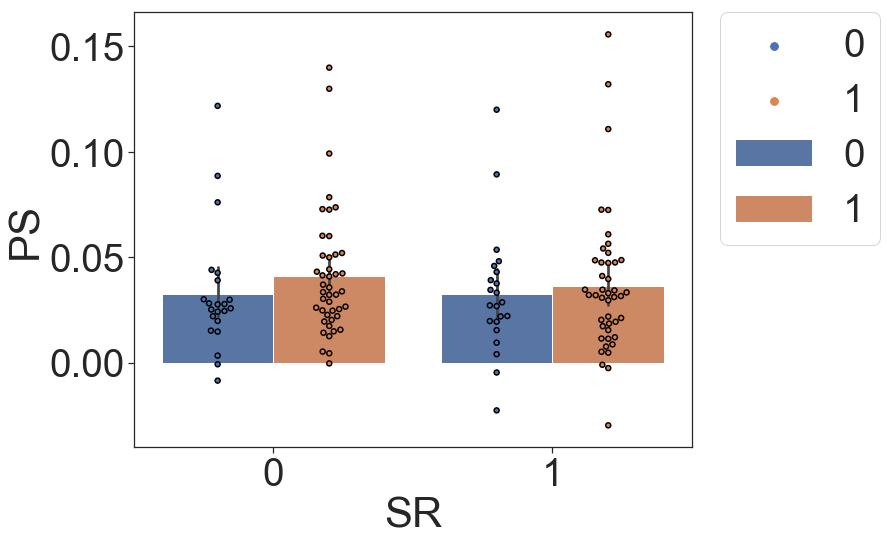

In [129]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")

SR_FR_CR_rep.head(10)

plot_four= sns.barplot(x = "SR", y = "PS", hue = "CR",  data = SR_FR_CR_rep[SR_FR_CR_rep['ROI']==85])
sns.swarmplot(x = "SR", y = "PS", hue = "CR", data = SR_FR_CR_rep[SR_FR_CR_rep['ROI']==85], dodge = True, edgecolor = "black", linewidth = 1.5)


plot_four.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

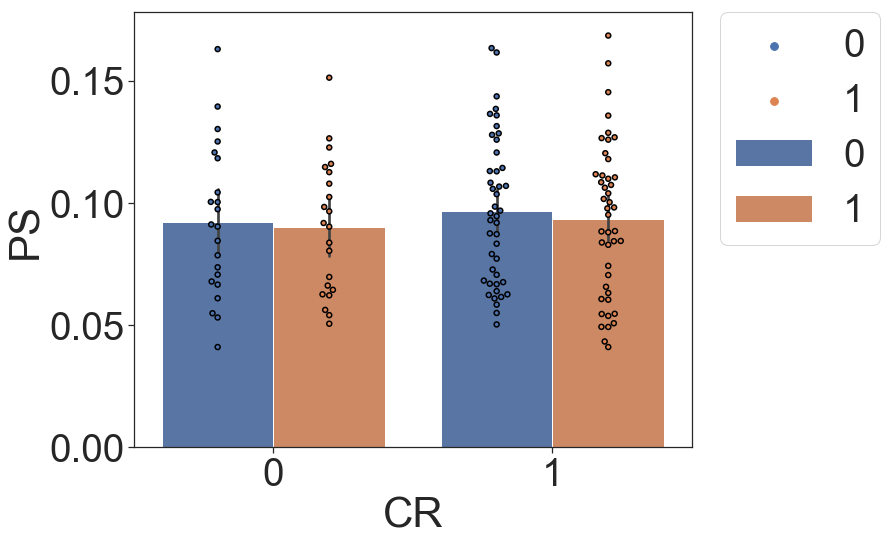

In [140]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")



plot_five= sns.barplot(x = "CR", y = "PS", hue = "SR",  data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==1])
sns.swarmplot(x = "CR", y = "PS", hue = "SR", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==1], dodge = True, edgecolor = "black", linewidth = 1.5)


plot_five.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

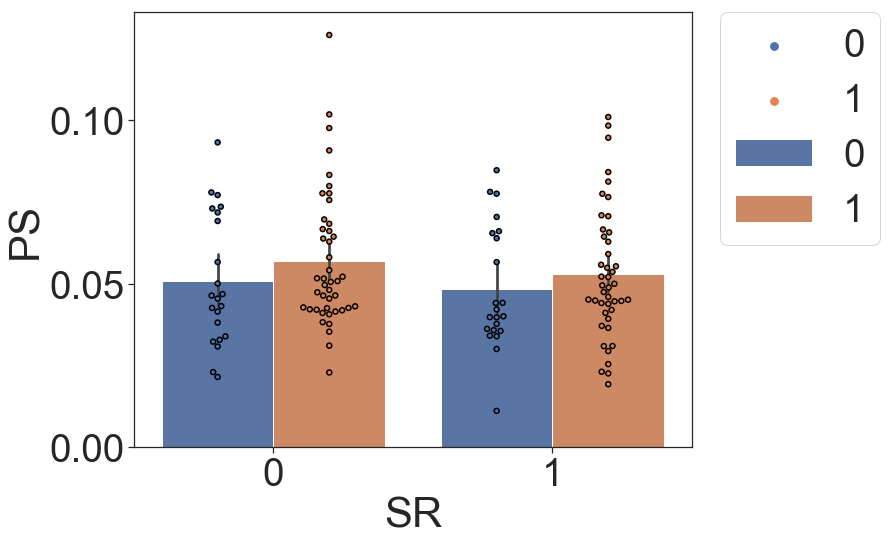

In [144]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=3.5)
sns.set_style("ticks")



plot_five= sns.barplot(x = "SR", y = "PS", hue = "CR",  data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==2])
sns.swarmplot(x = "SR", y = "PS", hue = "CR", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==2], dodge = True, edgecolor = "black", linewidth = 1.5)


plot_five.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Figure size 720x1440 with 0 Axes>

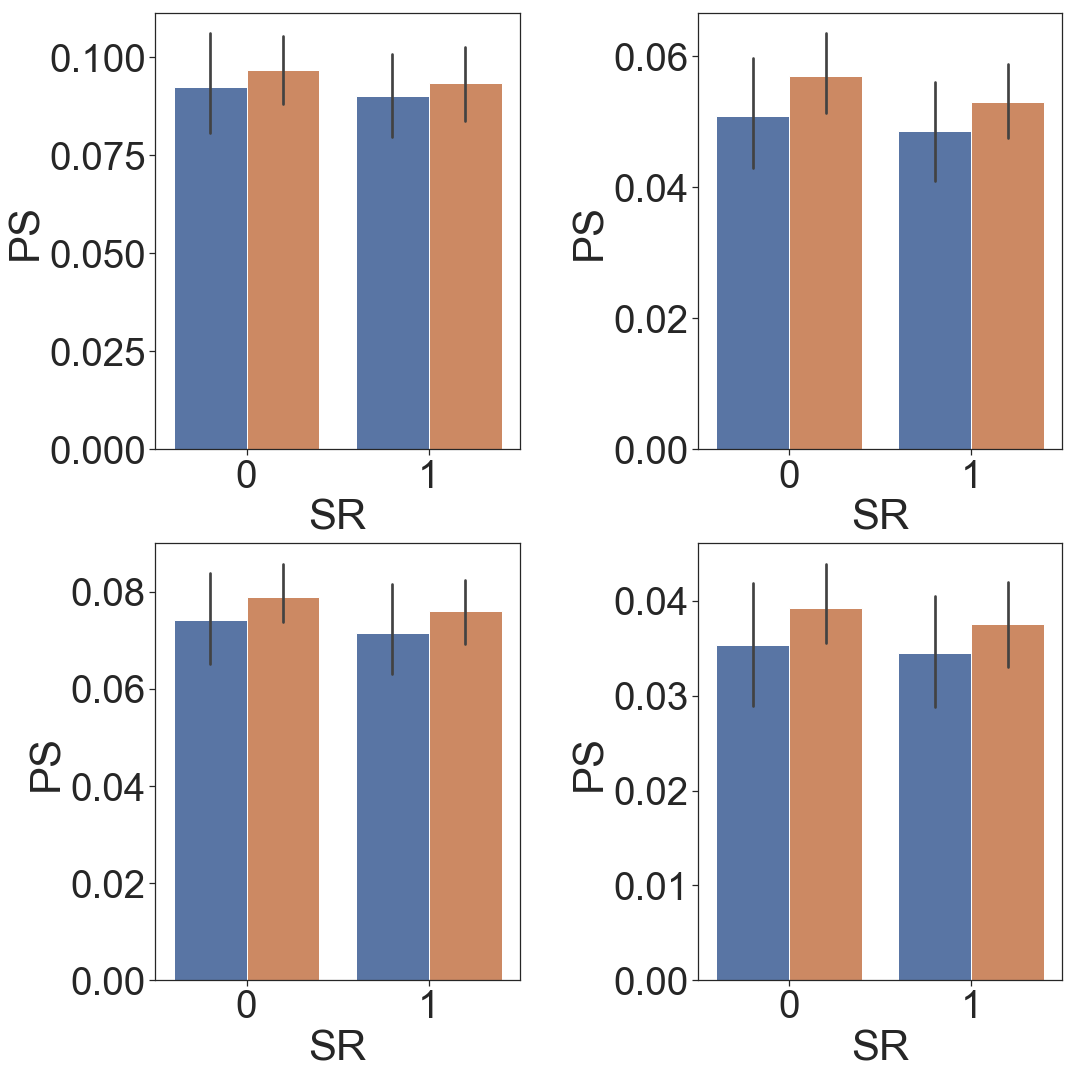

In [159]:
plt.figure(figsize=(10, 20))
sns.set(font_scale=3.5)
sns.set_style("ticks")

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (16,16))

sns.barplot(x = "SR", y = "PS", hue = "CR",  data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==1], ax = ax1)
sns.barplot(x = "SR", y = "PS", hue = "CR",  data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==2], ax = ax2)
sns.barplot(x = "SR", y = "PS", hue = "CR",  data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==3], ax = ax3)
sns.barplot(x = "SR", y = "PS", hue = "CR",  data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==4], ax = ax4)



plt.tight_layout(h_pad=.01)
ax1.legend().remove()
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 720x1440 with 0 Axes>

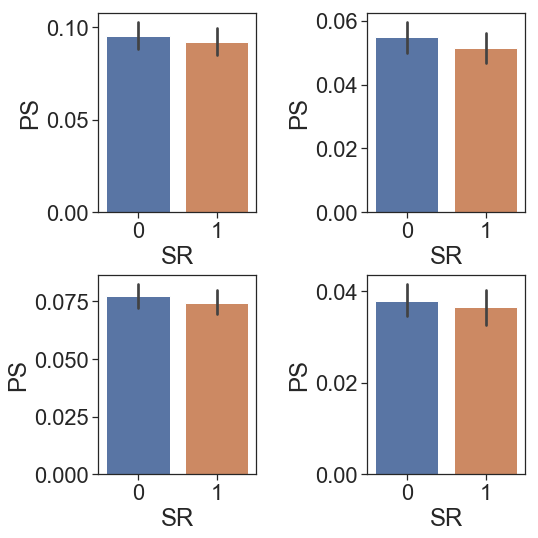

In [165]:
plt.figure(figsize=(10, 20))
sns.set(font_scale=2)
sns.set_style("ticks")

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8,8))

sns.barplot(x = "SR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==1], ax = ax1)
sns.barplot(x = "SR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==2], ax = ax2)
sns.barplot(x = "SR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==3], ax = ax3)
sns.barplot(x = "SR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==4], ax = ax4)



plt.tight_layout(h_pad=.01)
ax1.legend().remove()
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 720x1440 with 0 Axes>

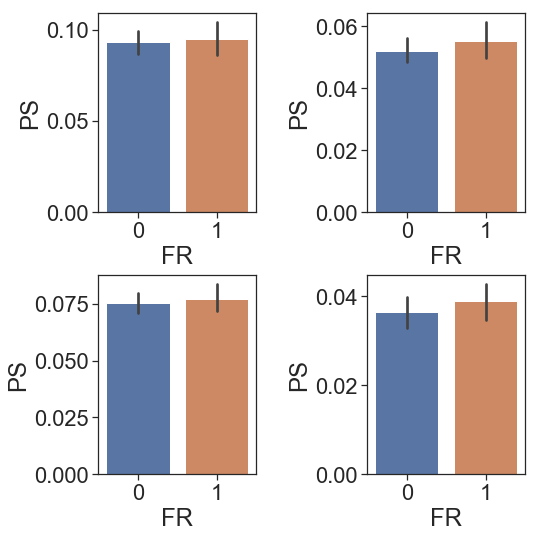

In [166]:
plt.figure(figsize=(10, 20))
sns.set(font_scale=2)
sns.set_style("ticks")

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8,8))

sns.barplot(x = "FR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==1], ax = ax1)
sns.barplot(x = "FR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==2], ax = ax2)
sns.barplot(x = "FR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==3], ax = ax3)
sns.barplot(x = "FR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==4], ax = ax4)



plt.tight_layout(h_pad=.01)
ax1.legend().remove()
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 720x1440 with 0 Axes>

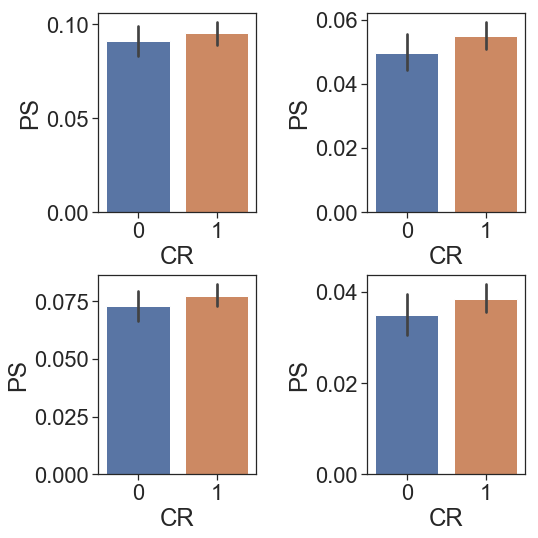

In [167]:
plt.figure(figsize=(10, 20))
sns.set(font_scale=2)
sns.set_style("ticks")

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8,8))

sns.barplot(x = "CR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==1], ax = ax1)
sns.barplot(x = "CR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==2], ax = ax2)
sns.barplot(x = "CR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==3], ax = ax3)
sns.barplot(x = "CR", y = "PS", data = SR_FR_CR_network_rep[SR_FR_CR_network_rep['Network']==4], ax = ax4)



plt.tight_layout(h_pad=.01)
ax1.legend().remove()
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()